In [1]:
%autosave 0

Autosave disabled


<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 20px 5px 0px 5px; 
            border: 10px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"
          
 <font color='blue'>**Chapter 31-5: Elliptic PDEs Using the Relaxation Method**.
 
 Relaxation methods are important especially in the solution of linear systems used to model elliptic partial differential equations, such as Laplace's equation and its generalization, Poisson's equation. These equations describe boundary-value problems, in which the solution-function's values are specified on the boundary of a domain; the problem is to compute a solution also on its interior. Relaxation methods are used to solve the linear equations resulting from a discretization of the differential equation, for example by finite differences.

Iterative relaxation of solutions is commonly dubbed **smoothing** because with certain equations, such as Laplace's equation, it resembles repeated application of a local smoothing filter to the solution vector. These are not to be confused with relaxation methods in mathematical optimization, which approximate a difficult problem by a simpler problem whose "relaxed" solution provides information about the solution of the original problem.
 
 

 

<br>

  </font>
  
  
  
</div>



<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Solve the Laplace heat transfer equation of a plate with one side insulated (zero Neumann BC), two sides held at a fixed temperature (Dirichlet condition) and one side touching a component that has a sinusoidal distribution of temperature. The boundary conditions, expressed numerically, are:

$$p\,=\,0 \:\:\textrm{at}\:\:x\,=\,0$$

$$\frac{\partial p}{\partial x}\,=\,0\:\:\textrm{at}\:\:x\,=\,L$$

$$p\,=\,0\:\:\textrm{at}\:\:y\,=\,0$$

$$p\,=\,\textrm{sin}\left(\frac{\frac{3}{2}\pi x}{L}\right)\:\:\textrm{at}\:\:y\,=\,H.$$

(Problem and solution modified slightly from https://barbagroup.github.io/essential_skills_RRC/laplace/1/)





</font>
</div>



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The steady state heat equation looks like

$$\frac{\partial^2 T}{\partial x^2}\,+\,\frac{\partial^2 T}{\partial y^2}\,=\,0$$

where T is a temperature that has reached a steady state. This can be modified slightly so that

$$\frac{\partial^2 p}{\partial x^2}\,+\,\frac{\partial^2 p}{\partial y^2}\,=\,0$$

where $p$ is the generic dependent variable.

</font>                 
</div>

In [32]:
from matplotlib import pyplot
import numpy
%config InlineBackend.figure_formats = ['svg']
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 9



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Start with an initial guess for the solution, $\:p_{i,j}^0,\:$ and use the discrete Laplacian to get an update, $\:p_{i,j}^1\:,$ then continue on computing $\:p_{i,j}^k\:$ until the remaining error reaches a sufficiently small size. Note that $k$ is not a time index here, rather an index corresponding to the number of iterations performed in the **relaxation scheme**.

At each iteration, updated values $\:p_{i,j}^{k+1}\:$ are computed in a logical way so that they converge to a set of values satisfying Laplace's equation. The system will reach equilibrium only as the number of iterations tends to $\infty$, but the equilibrium state can be approximated by iterating until the change between one iteration and the next is very small.

The most intuitive method of iterative solution is known as the Jacobi method, in which the values at the grid points are replaced by the corresponding weighted averages:

$$p_{i,j}^{k+1}\,=\,\frac{1}{4}\left(p_{i,j-1}^k\,+\,p_{i,j+1}^k\,+\,p_{i-1,j}^k\,+\,p_{i+1,j}^k\right)$$

This method converges to the solution of Laplace's equation.
</font>                 
</div>

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>In the iterative solution of Laplace's equation, boundary conditions are set and the solution "relaxes" from an initial guess to meld the boundaries together smoothly, based on the values of the boundary conditions. The initially assigned guess will be $p\,=\,0$ everywhere.
</font>                 
</div>

In [34]:
def plot_3D(x, y, p):
    '''Creates 3D plot with appropriate limits and viewing angle

    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    p: 2D array of float
        calculated potential field

    '''
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    #ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>An appropriate plotting setting is defined in the above cell. The commented line is obsolete in newer Matplotlib releases, and is replaced with the current version in the line below it.
</font>                 
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>***Analytical solution***

The Laplace equation with the boundary conditions listed above has an analytical solution, given by

$$p(x,y)\,=\,\frac{\textrm{sinh}\left(\frac{\frac{3}{2}\pi y}{L}\right)}{\textrm{sinh}\left(\frac{\frac{3}{2}\pi H}{L}\right)}\textrm{sin}\left(\frac{\frac{3}{2}\pi x}{L}\right)$$

where $L$ and $H$ are the length of the domain in the $x$ and $y$ directions, respectively.
</font>                 
</div>

In [35]:
def p_analytical(x, y):
    X, Y = numpy.meshgrid(x,y)

    p_an = numpy.sinh(1.5*numpy.pi*Y / x[-1]) /\
    (numpy.sinh(1.5*numpy.pi*y[-1]/x[-1]))*numpy.sin(1.5*numpy.pi*X/x[-1])

    return p_an



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>At this point the analytical solution can be tested for reasonableness by comparing output with the plot_3D function written above.
</font>                 
</div>

In [36]:
nx = 41
ny = 41

x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)

p_an = p_analytical(x,y)



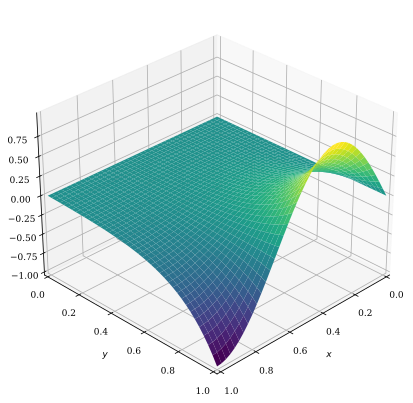

In [37]:
plot_3D(x,y,p_an)



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Inasmuch as the analytical solution is the basis of the plot, the final numerical solution, following relaxation, should closely resemble it.
</font>                 
</div>

In [38]:
def L2_error(p, pn):
    return numpy.sqrt(numpy.sum((p - pn)**2)/numpy.sum(pn**2))



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>To compare two successive fields during the iteration, the accepted method is consideration of the difference, or ***L2norm***.  In order to avoid allowing the size of the grid to influence the perception of the value of the L2norm, it is necessary to ***normalize*** it by dividing by the norm of the potential field at iteration $k$ which results in an expression for the normalized quantity as

$$|x|\,=\,\frac{ \sqrt{\sum_{i=0,j=0}^k\,\left|p_{i,j}^{k+1}\,-\,p_{i,j}^k\right|^2  } } {\sqrt{\sum_{i=0,j=0}^k\,\left|p_{i,j}^k\right|^2  }} $$                                       
</font>                 
</div>

In [39]:
def laplace2d(p, l2_target):
    '''Iteratively solves the Laplace equation using the Jacobi method

    Parameters:
    ----------
    p: 2D array of float
        Initial potential distribution
    l2_target: float
        target for the difference between consecutive solutions

    Returns:
    -------
    p: 2D array of float
        Potential distribution after relaxation
    '''

    l2norm = 1
    pn = numpy.empty_like(p)
    while l2norm > l2_target:
        pn = p.copy()
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1, :-2] \
                              + pn[2:, 1:-1] + pn[:-2, 1:-1])

        ##Neumann B.C. along x = L
        p[1:-1, -1] = p[1:-1, -2]     # 1st order approx of a derivative 
        l2norm = L2_error(p, pn)

    return p



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The initial values of the potential field are zero everywhere, according to initial guess, except at the boundary, where non-zero values are displayed. As a formula it can be expressed as

$$p\,=\,\textrm{sin}\left(\frac{\frac{3}{2}\pi x}{L}\right)\:\:\textrm{at}\:\:y\,=\,H$$

It may be helpful to plot a visualization of the initialized domain to verify the relaxation process.
</font>                 
</div>

In [40]:
##variable declarations
nx = 41
ny = 41


##initial conditions
p = numpy.zeros((ny,nx)) ##create a XxY vector of 0's


##plotting aids
x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)

##Dirichlet boundary conditions
p[-1,:] = numpy.sin(1.5*numpy.pi*x/x[-1])



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The plot below, it must be remembered, is only of the initialized domain, and does not represent an actual state. It does verify that no non-zero function values are being generated anywhere except on the boundary.
</font>                 
</div>

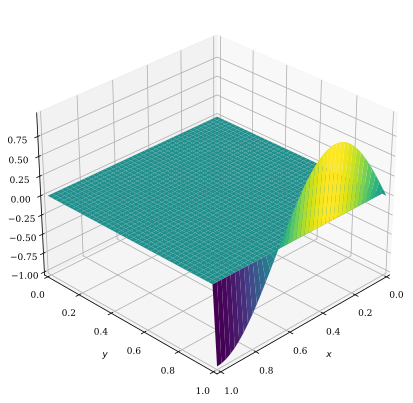

In [41]:

plot_3D(x, y, p)



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>A target L2norm difference of $10^{-8}$ can easily be inserted into the relaxation stack and used for a visualization.
</font>                 
</div>

In [42]:
p = laplace2d(p.copy(), 1e-8)



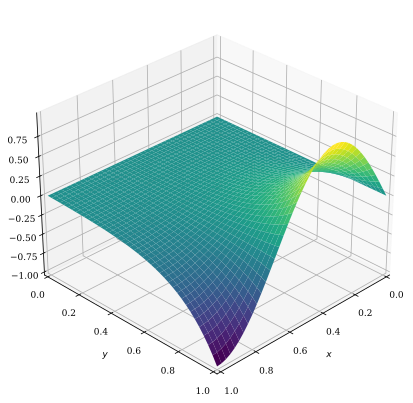

In [43]:

plot_3D(x,y,p_an)



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>If the resulting plot looks like the analytical solution, that is to the credit of the relaxation method. The problem source site, cited above, goes into a convergence analysis for this problem, which seems enlightening and which could be very helpful for any serious work undertaken with the present method.
</font>                 
</div>